# Financial Data Project

<b>Author:</b> Piotr Drużdżel <br>
<b>E-mail:</b> piotr.druzdzel@gmail.com

<b>Main objective:</b> practice Pandas and visualization techniques with financial data

<b>Data source:</b> Yahoo Finance and Stooq.pl

<b>Analysis concerns the following stocks:</b> <br>

<b>Banks:</b> <br>
Bank of America <br>
CitiGroup <br>
Goldman Sachs <br>
JPMorgan Chase <br>
Morgan Stanley <br>
Wells Fargo <br>

<b>Tech Companies:</b> <br>
Apple CitiGroup <br>
Microsoft CitiGroup <br>
Netflix <br>
Google <br>
Amazon <br>

<b>Pharmaceutical Companies:</b> <br>
Sanofi <br>
Novartis <br>

<b>Automotive/Aerospace Companies:</b> <br>
Airbus <br>
Delta Airlines <br>
BMW <br>

#### Timing the script:

In [1]:
from datetime import datetime
startTime = datetime.now()

#### Quick fix for the dark theme plotting to have readable labels:

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='chesterish', context='notebook', ticks=True, grid=False)

## Getting the data

Importing the basic libraries:

In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Setting up the time-frame of interest for the API:

In [4]:
from datetime import datetime

start = datetime(2006, 1, 1)
end = datetime(2020, 11, 7)

Extracting data from Yahoo Finance via "get_data_yahoo" from pandas_datareader.data:

In [5]:
# Bank of America
BAC = data.get_data_yahoo('BAC',start,end)
#CitiGroup
C = data.get_data_yahoo('C',start,end)
#Goldman Sachs
GS = data.get_data_yahoo('GS',start,end)
#JPMorgan Chase
JPM = data.get_data_yahoo('JPM',start,end)
#Morgan Stanley
MS = data.get_data_yahoo('MS',start,end)
#Wells Fargo
WFC = data.get_data_yahoo('WFC',start,end)

Creating the list of bank symbols:

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Checking the format:

In [7]:
BAC

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.811729
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.442013
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.486385
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.434616
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.456806
...               ...        ...        ...        ...         ...        ...
2020-11-02  24.260000  23.469999  23.889999  24.080000  59756400.0  24.080000
2020-11-03  24.940001  24.510000  24.580000  24.690001  65106200.0  24.690001
2020-11-04  24.139999  23.270000  23.889999  23.680000  88845500.0  23.680000
2020-11-05  24.790001  23.860001  23.900000  24.610001  74722600.0  24.610001
2020-11-06  24.959999  24.230000  24.930000  24.309999  55425700.0  24.309999

[3739 rows x 6 columns]

Concatenating the bank dataframes together to a single data frame. <br>
Setting the keys argument equal to the tickers list (using the passed keys as the outermost level). <br>
Setting the names for the levels in the resulting hierarchical index:

In [8]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], keys=tickers, axis=1, names=['Bank Ticker', 'Stock Info'])
bank_stocks

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   
...                ...        ...        ...        ...         ...   
2020-11-02   24.260000  23.469999  23.889999  24.080000  59756400.0   
2020-11-03   24.940001  24.510000  24.580000  24.690001  65106200.0   
2020-11-04   24.139999  23.270000  23.889999  23.680000  88845500.0   
2020-11-05   24.790001  23.860001  23.900000  24.610001  74722600.0   
2020-11-06   24.959999  24.230000  24.930000  24.309999  55425700.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.811729  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.442013  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.486385  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.434616  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.456806  487.399994  483.000000  486.000000  483.899994  ...   
...                ...         ...         ...         ...         ...  ...   
2020-11-02   24.080000   42.669998   41.200001   41.860001   42.209999  ...   
2020-11-03   24.690001   44.020000   43.060001   43.299999   43.529999  ...   
2020-11-04   23.680000   43.410000   41.900002   42.529999   42.080002  ...   
2020-11-05   24.610001   43.580002   42.180000   42.340000   43.070000  ...   
2020-11-06   24.309999   43.610001   42.500000   43.509998   42.709999  ...   

Bank Ticker         MS                                          WFC  \
Stock Info        Open      Close      Volume  Adj Close       High   
Date                                                                  
2006-01-03   57.169998  58.310001   5377000.0  36.867344  31.975000   
2006-01-04   58.700001  58.349998   7977800.0  36.892612  31.820000   
2006-01-05   58.549999  58.509998   5778000.0  36.993786  31.555000   
2006-01-06   58.770000  58.570000   6889800.0  37.031731  31.775000   
2006-01-09   58.630001  59.189999   4144500.0  37.423725  31.825001   
...                ...        ...         ...        ...        ...   
2020-11-02   48.880001  49.380001  16337800.0  49.380001  21.980000   
2020-11-03   50.410000  51.180000  13142200.0  51.180000  22.500000   
2020-11-04   50.529999  51.430000  17378000.0  51.430000  22.559999   
2020-11-05   52.000000  52.200001   9444300.0  52.200001  22.570000   
2020-11-06   52.580002  51.700001   6453100.0  51.700001  22.570000   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2006-01-03   31.195000  31.600000  31.900000  11016400.0  20.723480  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  20.483118  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  20.460379  
2006-01-06   31.385000  31.580000  31.680000   8403800.0  20.580564  
2006-01-09   31.555000  31.674999  31.674999   5619600.0  20.577309  
...                ...        ...        ...         ...        ...  
2020-11-02   21.190001  21.700001  21.900000  38401200.0  21.799908  
2020-11-03   21.990000  22.309999  22.090000  38427000.0  21.989040  
2020-11-04   21.170000  21.750000  21.879999  47203200.0  21.779999  
2020-11-05   21.860001  21.889999  22.330000  38319700.0  22.33

Another way of setting the columns names levels (already done in the line above):

In [9]:
#bank_stocks.columns.names = ['Bank Ticker','Stock Info']

Quick result check so far:

In [10]:
bank_stocks

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   
...                ...        ...        ...        ...         ...   
2020-11-02   24.260000  23.469999  23.889999  24.080000  59756400.0   
2020-11-03   24.940001  24.510000  24.580000  24.690001  65106200.0   
2020-11-04   24.139999  23.270000  23.889999  23.680000  88845500.0   
2020-11-05   24.790001  23.860001  23.900000  24.610001  74722600.0   
2020-11-06   24.959999  24.230000  24.930000  24.309999  55425700.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.811729  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.442013  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.486385  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.434616  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.456806  487.399994  483.000000  486.000000  483.899994  ...   
...                ...         ...         ...         ...         ...  ...   
2020-11-02   24.080000   42.669998   41.200001   41.860001   42.209999  ...   
2020-11-03   24.690001   44.020000   43.060001   43.299999   43.529999  ...   
2020-11-04   23.680000   43.410000   41.900002   42.529999   42.080002  ...   
2020-11-05   24.610001   43.580002   42.180000   42.340000   43.070000  ...   
2020-11-06   24.309999   43.610001   42.500000   43.509998   42.709999  ...   

Bank Ticker         MS                                          WFC  \
Stock Info        Open      Close      Volume  Adj Close       High   
Date                                                                  
2006-01-03   57.169998  58.310001   5377000.0  36.867344  31.975000   
2006-01-04   58.700001  58.349998   7977800.0  36.892612  31.820000   
2006-01-05   58.549999  58.509998   5778000.0  36.993786  31.555000   
2006-01-06   58.770000  58.570000   6889800.0  37.031731  31.775000   
2006-01-09   58.630001  59.189999   4144500.0  37.423725  31.825001   
...                ...        ...         ...        ...        ...   
2020-11-02   48.880001  49.380001  16337800.0  49.380001  21.980000   
2020-11-03   50.410000  51.180000  13142200.0  51.180000  22.500000   
2020-11-04   50.529999  51.430000  17378000.0  51.430000  22.559999   
2020-11-05   52.000000  52.200001   9444300.0  52.200001  22.570000   
2020-11-06   52.580002  51.700001   6453100.0  51.700001  22.570000   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2006-01-03   31.195000  31.600000  31.900000  11016400.0  20.723480  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  20.483118  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  20.460379  
2006-01-06   31.385000  31.580000  31.680000   8403800.0  20.580564  
2006-01-09   31.555000  31.674999  31.674999   5619600.0  20.577309  
...                ...        ...        ...         ...        ...  
2020-11-02   21.190001  21.700001  21.900000  38401200.0  21.799908  
2020-11-03   21.990000  22.309999  22.090000  38427000.0  21.989040  
2020-11-04   21.170000  21.750000  21.879999  47203200.0  21.779999  
2020-11-05   21.860001  21.889999  22.330000  38319700.0  22.33

In [11]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3739 entries, 2006-01-03 to 2020-11-06
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (BAC, High)       3739 non-null   float64
 1   (BAC, Low)        3739 non-null   float64
 2   (BAC, Open)       3739 non-null   float64
 3   (BAC, Close)      3739 non-null   float64
 4   (BAC, Volume)     3739 non-null   float64
 5   (BAC, Adj Close)  3739 non-null   float64
 6   (C, High)         3739 non-null   float64
 7   (C, Low)          3739 non-null   float64
 8   (C, Open)         3739 non-null   float64
 9   (C, Close)        3739 non-null   float64
 10  (C, Volume)       3739 non-null   float64
 11  (C, Adj Close)    3739 non-null   float64
 12  (GS, High)        3739 non-null   float64
 13  (GS, Low)         3739 non-null   float64
 14  (GS, Open)        3739 non-null   float64
 15  (GS, Close)       3739 non-null   float64
 16  (GS, Volume)      3739 n

Classic check for missing values:

In [12]:
bank_stocks.isnull().sum()

Bank Ticker  Stock Info
BAC          High          0
             Low           0
             Open          0
             Close         0
             Volume        0
             Adj Close     0
C            High          0
             Low           0
             Open          0
             Close         0
             Volume        0
             Adj Close     0
GS           High          0
             Low           0
             Open          0
             Close         0
             Volume        0
             Adj Close     0
JPM          High          0
             Low           0
             Open          0
             Close         0
             Volume        0
             Adj Close     0
MS           High          0
             Low           0
             Open          0
             Close         0
             Volume        0
             Adj Close     0
WFC          High          0
             Low           0
             Open          0
             Close 

### Basic analysis with using cross-section method (DataFrame.xs):

The max Close price for each bank's stock throughout the time period:

In [13]:
bank_stocks.xs('Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    141.089996
MS      89.300003
WFC     65.930000
dtype: float64

Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. <br>
Returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [14]:
returns = pd.DataFrame()

Using pandas <b>pct_change()</b> method on the "Close" column to create a column representing this return value. <br>
From the documentation: <b>pct_change()</b> function calculates the percentage change between the current and a prior element.

Creating <b>for</b> loop that for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame:

In [15]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158
...                ...       ...        ...         ...        ...         ...
2020-11-02    0.016034  0.019073   0.006136    0.022542   0.025545    0.020979
2020-11-03    0.025332  0.031272   0.040641    0.031521   0.036452    0.008676
2020-11-04   -0.040907 -0.033310  -0.000303   -0.030558   0.004885   -0.009507
2020-11-05    0.039274  0.023527   0.025724    0.040898   0.014972    0.020567
2020-11-06   -0.012190 -0.008359  -0.008376   -0.013321  -0.009579   -0.018809

[3739 rows x 6 columns]

Maximum returns throughout this period:

In [16]:
returns.max()

BAC Return    0.352691
C Return      0.578249
GS Return     0.264678
JPM Return    0.250967
MS Return     0.869835
WFC Return    0.327645
dtype: float64

Average daily return:

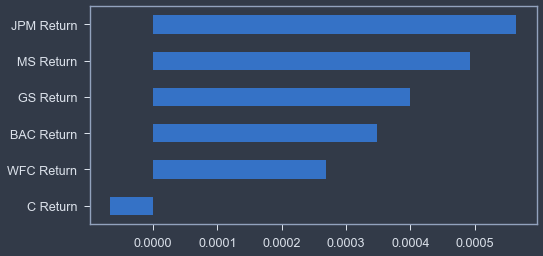

In [17]:
plt.figure(figsize=(8,4))
returns.mean().sort_values(ascending=True).plot(kind='barh')

Exploratory classic pairplot on the <b>returns</b> DataFrame to check for correlations:

A small update on "pairplot" method - it digests the NaN now, so it is not necessary to skip the first row with "returns[1:]"

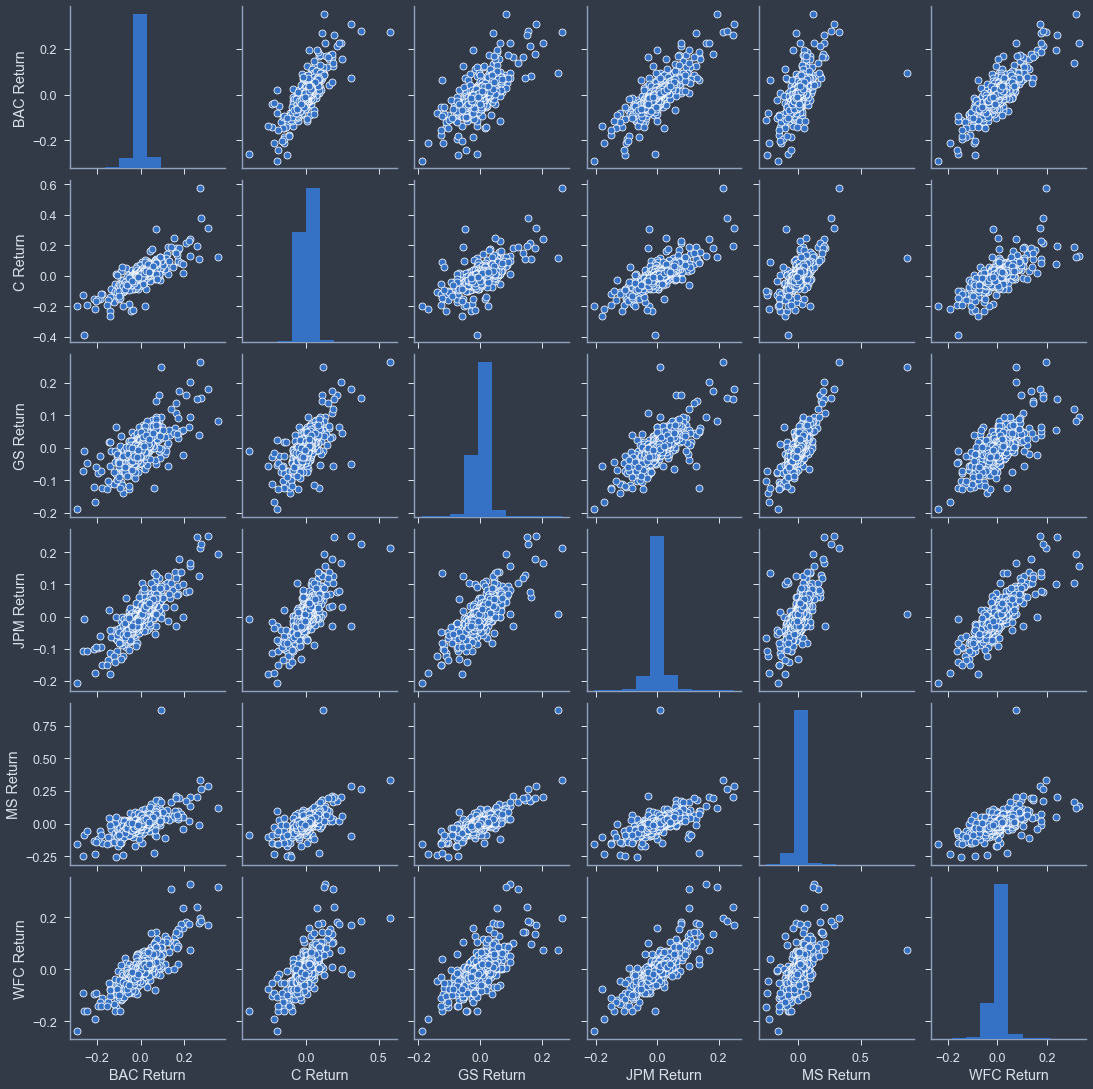

In [18]:
sns.pairplot(returns)

Searching on what dates each bank stock had the best and worst single day returns. <br>
<b>idxmin()</b> finds the index of the minimum value along the index axis.

In [19]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

2009-01-20 was Barack Obama's inaugurational day. Larger political changes usually have impack on the financial market.

Best Single Day Gain:

In [20]:
# It turns out that Citigroup stock split in May 2011, but also JPM day after inauguration:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [21]:
returns.loc['2011-05-09']

BAC Return   -0.010561
C Return     -0.023009
GS Return    -0.006529
JPM Return   -0.001776
MS Return    -0.006339
WFC Return   -0.001416
Name: 2011-05-09 00:00:00, dtype: float64

In [22]:
returns.loc['2008-11-24']

BAC Return    0.272014
C Return      0.578249
GS Return     0.264678
JPM Return    0.213908
MS Return     0.331343
WFC Return    0.195772
Name: 2008-11-24 00:00:00, dtype: float64

Looking a standard deviation of the returns we classify the riskiest over the entire time period:

In [23]:
returns.std()

BAC Return    0.032529
C Return      0.034450
GS Return     0.023769
JPM Return    0.025156
MS Return     0.033459
WFC Return    0.027493
dtype: float64

It looks like CitiGroup, which indeed had a big crash has the largest 'dispersion' of the returns.

By looking at the 'risk profile' outside of crisis, e.g. in 2015, it looks quite similar:

In [24]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

A distplot using seaborn of the 2015 returns for Morgan Stanley:

In [25]:
returns.loc['2015-01-01':'2015-12-31']['MS Return']

Date
2015-01-02   -0.002320
2015-01-05   -0.031258
2015-01-06   -0.028800
2015-01-07    0.014278
2015-01-08    0.014889
                ...   
2015-12-24   -0.003681
2015-12-28   -0.009544
2015-12-29    0.011812
2015-12-30   -0.009831
2015-12-31   -0.013031
Name: MS Return, Length: 252, dtype: float64

### CitiGroup in 2006:

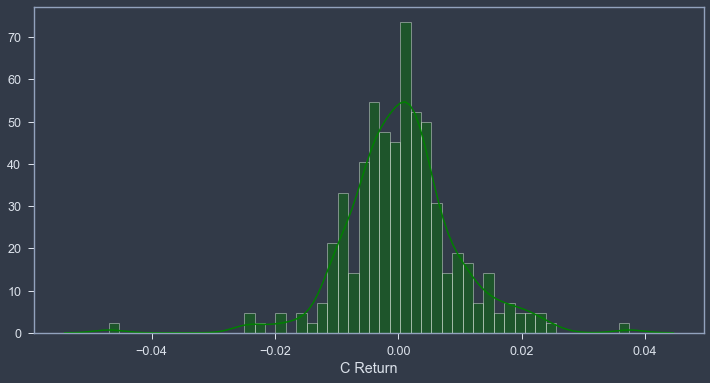

In [26]:
plt.figure(figsize=(12,6))
sns.distplot(returns.loc['2006-01-01':'2006-12-31']['C Return'], 
             color='green', 
             bins=50,  
             hist_kws=dict(edgecolor="w", linewidth=1)
            )

Standard deviation of:

In [27]:
returns.loc['2006-01-01':'2006-12-31']['C Return'].std()

0.009075150094967727

### CitiGroup in 2015:

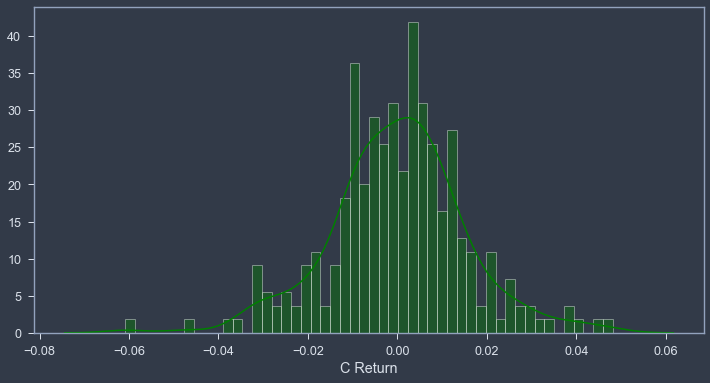

In [28]:
plt.figure(figsize=(12,6))
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['C Return'], 
             color='green', 
             bins=50,  
             hist_kws=dict(edgecolor="w", linewidth=1)
            )

Standard deviation of:

In [29]:
returns.loc['2015-01-01':'2015-12-31']['C Return'].std()

0.015289387324415937

Looks rather symmetric with few outliers, but when we look at CitiGroup, it is more skewed to the right (right thinner tail):

### CitiGroup in 2008:

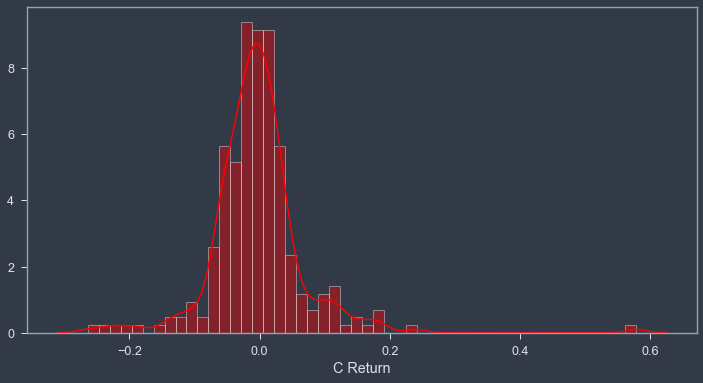

In [30]:
plt.figure(figsize=(12,6))
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], 
             color='red', 
             bins=50,  
             hist_kws=dict(edgecolor="w", linewidth=1))

Standard deviation of:

In [31]:
returns.loc['2008-01-01':'2008-12-31']['C Return'].std()

0.07352335695499639

### CitiGroup in 2020:

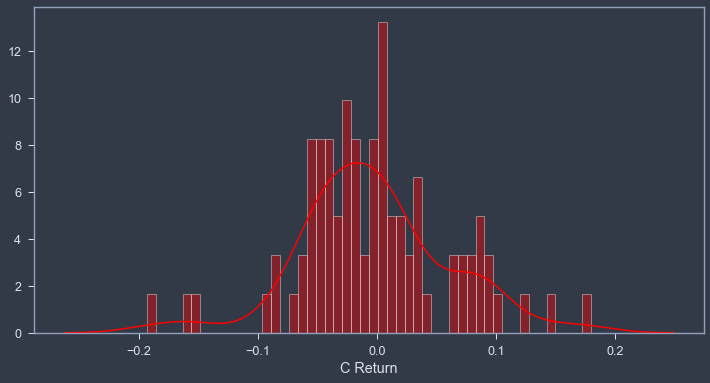

In [32]:
plt.figure(figsize=(12,6))
sns.distplot(returns.loc['2020-02-01':'2020-05-28']['C Return'], 
             color='red', 
             bins=50,  
             hist_kws=dict(edgecolor="w", linewidth=1))

Standard deviation of:

In [33]:
returns.loc['2020-01-01':'2020-12-31']['C Return'].std()

0.04438373010155734

So far (29th of May 2020) the standard deviation of the returns is almost as high as in the financial crisis outbreak year of 2008.

## Stock trends:

In [34]:
sns.set_style('whitegrid')

import plotly
import cufflinks as cf
cf.go_offline()

 A line plot showing Close price for each bank for the entire index of time:

Text(0, 0.5, 'Closing price')

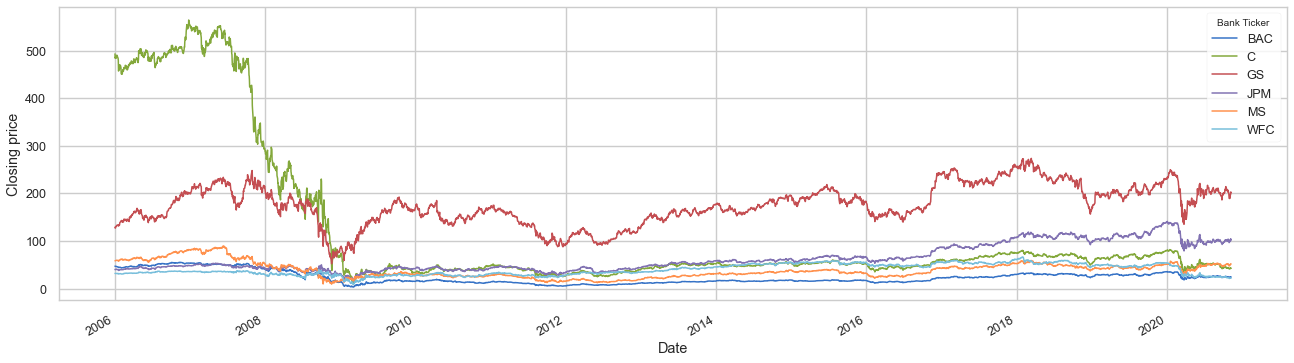

In [35]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(22,6))
plt.ylabel('Closing price')

Another, more traditional plotting:

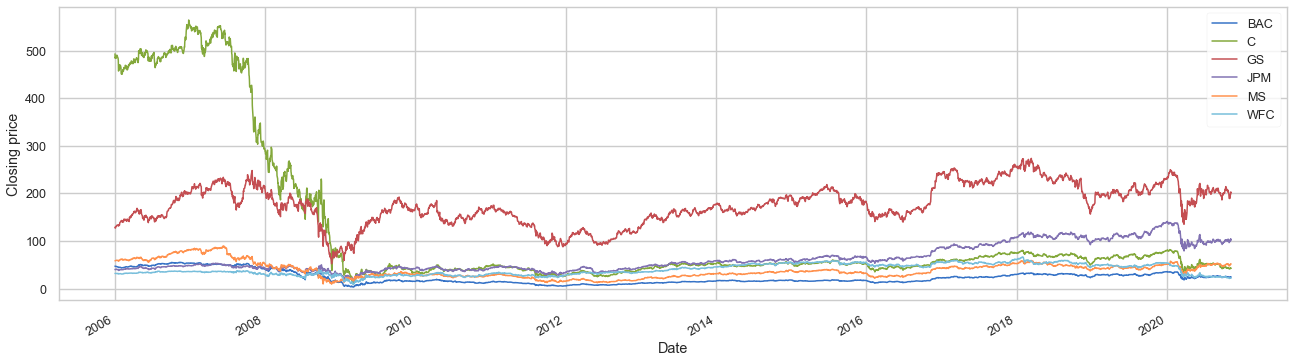

In [36]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(22,6), label=tick)
plt.ylabel('Closing price')
plt.legend()

Using more interactive way, like 'iplot' from plotly:

In [37]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

By looking on the above plots, we can see, that the market drop so far has been still relatively low w.r.t. the past, 2008 (although different) crisis.

The status on the 29th of May 2020 about the COVID-19 crisis it that the market dip is slowly emerging out of the recession in a "V-shape", however, many investors are sceptical and expect further declines as the economies are ailing. <br>
High levels from January 2020 on the financial market might be a region of interest. If the market fails to go above them, it can be sign for a potential decline again and an indication of inverors' fear of the second wave of the COVID-19 virus.

## Moving averages

The rolling 30 day average against the Close Price for Bank of America's stock for the period around crisis outbreak:

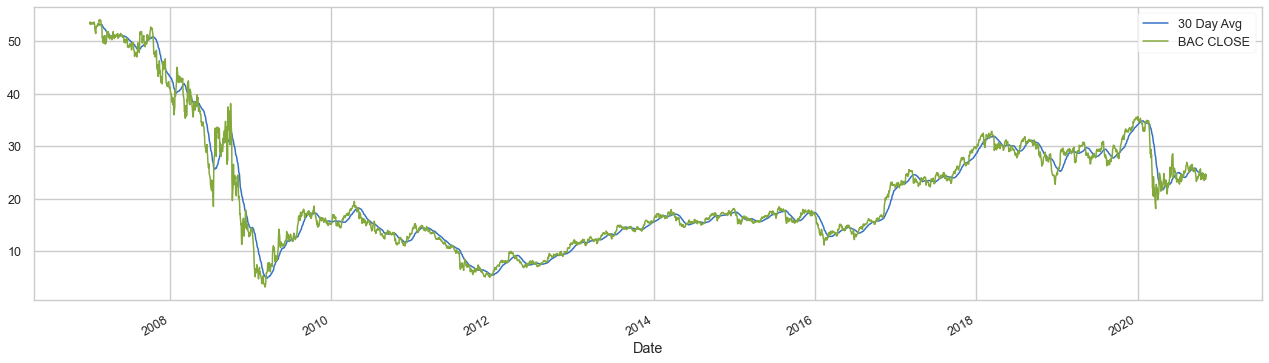

In [38]:
plt.figure(figsize=(22,6))
BAC['Close'].loc['2007-01-01':'2020-11-7'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2007-01-01':'2020-11-7'].plot(label='BAC CLOSE')
plt.legend()

Comparing the scale of the collapse between CitiGroup and Bank of America:

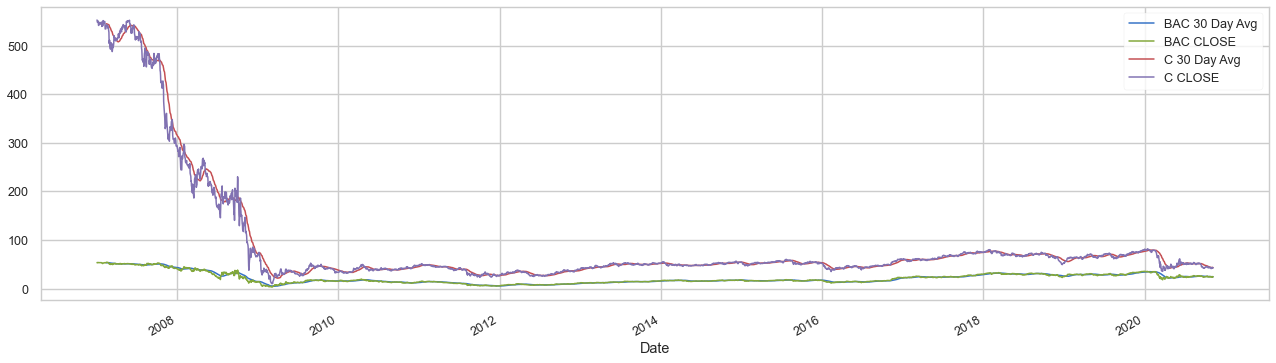

In [39]:
plt.figure(figsize=(22,6))

BAC['Close'].loc['2007-01-01':'2020-11-7'].rolling(window=30).mean().plot(label='BAC 30 Day Avg')
BAC['Close'].loc['2007-01-01':'2020-11-7'].plot(label='BAC CLOSE')

C['Close'].loc['2007-01-01':'2020-11-7'].rolling(window=30).mean().plot(label='C 30 Day Avg')
C['Close'].loc['2007-01-01':'2020-11-7'].plot(label='C CLOSE')

plt.legend()

A heatmap of the correlation between the stocks Close Price:

Creating the correlation matrix with <b>.corr()</b>:

In [40]:
close_prices_corr = bank_stocks.xs(key = 'Close', axis=1, level='Stock Info').corr()

Actual heatmap:

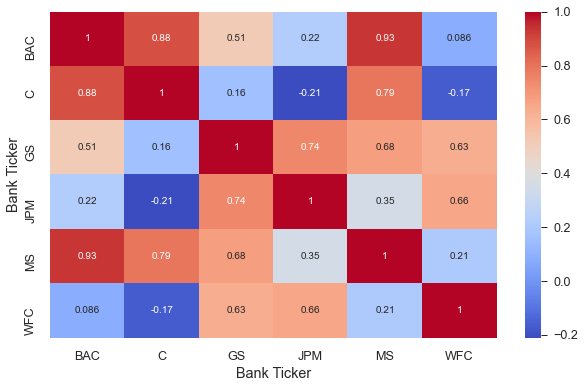

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(close_prices_corr, cmap='coolwarm', annot=True)

And clustermap:

<Figure size 720x432 with 0 Axes>

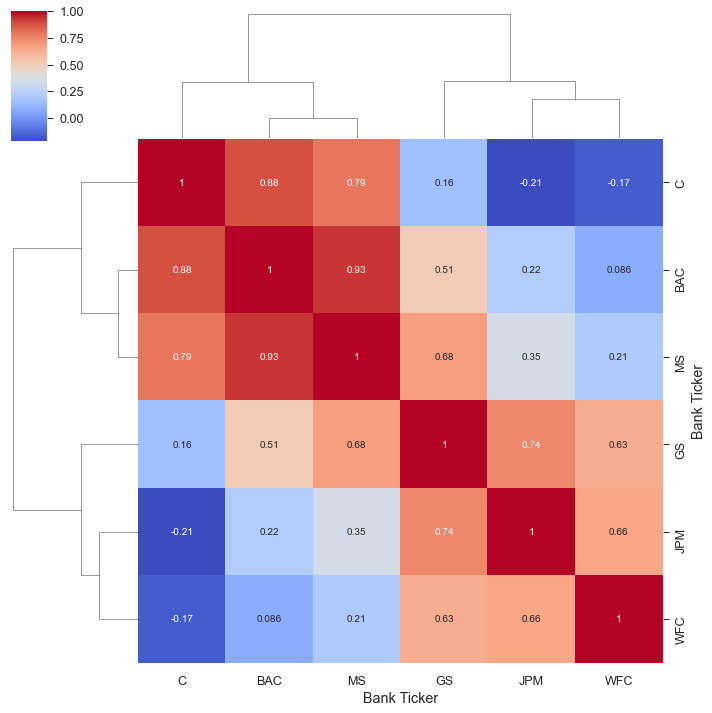

In [42]:
plt.figure(figsize=(10,6))
sns.clustermap(close_prices_corr, cmap='coolwarm', annot=True)

Above clustermap shows that Morgan Stanley is strongly correlated with Bank of America.

In [43]:
returns_corr = returns.corr()
returns_corr

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
BAC Return    1.000000  0.817462   0.713034    0.832265   0.677114    0.830332
C Return      0.817462  1.000000   0.699724    0.765770   0.666618    0.734574
GS Return     0.713034  0.699724   1.000000    0.762222   0.813844    0.684327
JPM Return    0.832265  0.765770   0.762222    1.000000   0.682066    0.829663
MS Return     0.677114  0.666618   0.813844    0.682066   1.000000    0.628436
WFC Return    0.830332  0.734574   0.684327    0.829663   0.628436    1.000000

<Figure size 720x432 with 0 Axes>

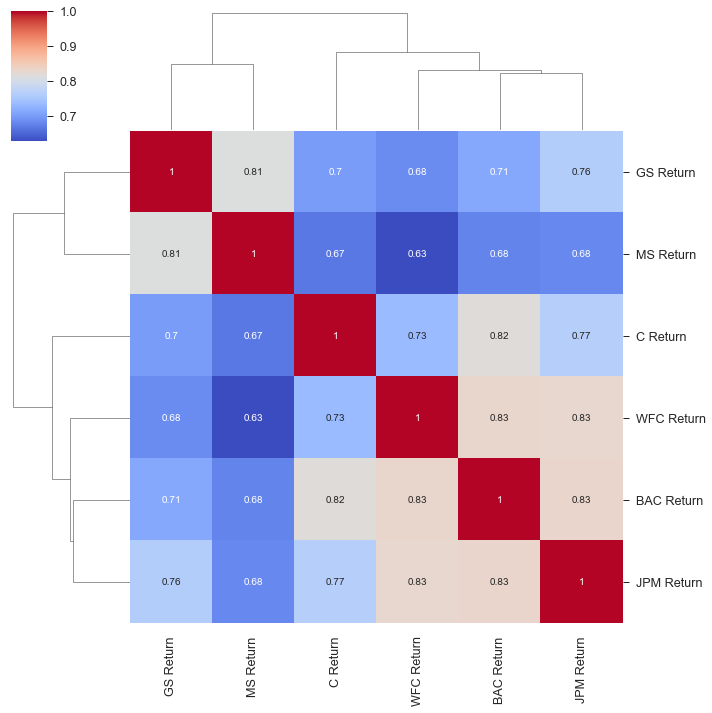

In [44]:
plt.figure(figsize=(10,6))
sns.clustermap(returns_corr, cmap='coolwarm', annot=True)

In terms of returns (computed with "pct_change()"), it looks like JPM, BAC and WFC are correlated stronger than GS, MS and Citigroup.

In [45]:
returns.loc['2008-10-10':'2008-10-20']

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2008-10-10    0.063169  0.091261  -0.123828    0.135224  -0.222490    0.038899
2008-10-13    0.091998  0.116230   0.250000    0.008405   0.869835    0.073826
2008-10-14    0.164107  0.182222   0.107207   -0.030484   0.212155    0.102632
2008-10-15   -0.102149 -0.128357  -0.079333   -0.054532  -0.173655   -0.005072
2008-10-16    0.018052 -0.020333  -0.006628    0.051962   0.030888    0.016492
2008-10-17   -0.041649 -0.064151   0.016904   -0.028649   0.029427   -0.054277
2008-10-20    0.049914  0.014113   0.062992    0.033816   0.027547    0.005303

## Financial crisis in 2008:

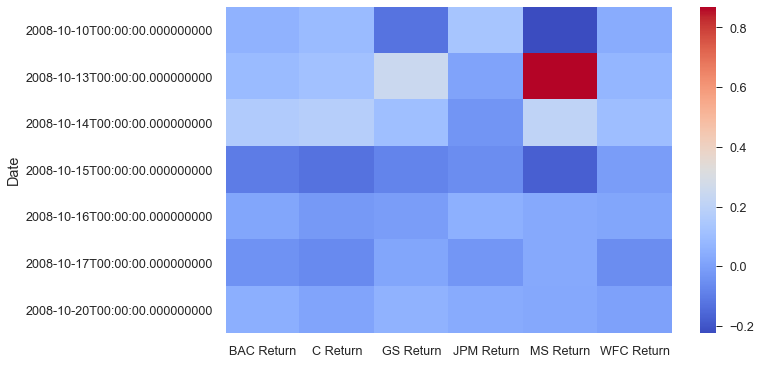

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(returns.loc['2008-10-10':'2008-10-20'], cmap='coolwarm')

It looks mlike on the 13th of October 2008, Morgan stanley was affected the most.

## COVID-19 crisis in 2020:

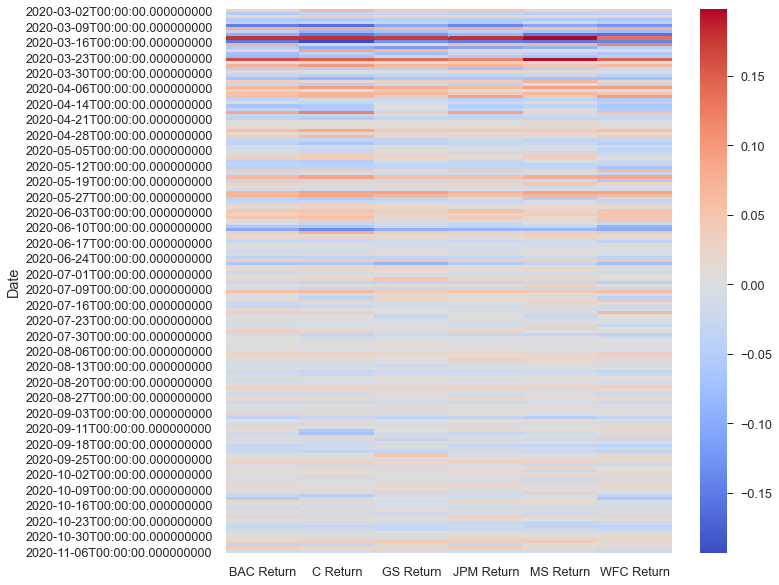

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(returns.loc['2020-03-01':'2020-11-7'], cmap='coolwarm')

## More technical analysis:

Using cufflinks library to create some Technical Analysis plots:


### COVID-19

Candle plot of Bank of America's stock from Jan 1st 2020 to May 28th 2020:

In [48]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2020-01-01':'2020-11-7'].iplot(kind='candle')

Simple Moving Averages plot of Morgan Stanley for the year 2020:

In [49]:
MS['Close'].loc['2020-01-01':'2020-11-7'].ta_plot(study='sma',periods=[14],title='Simple Moving Averages')

Bollinger Band plot for 30-day averaging:

(Bollinger Bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity, using a formulaic method propounded by John Bollinger in the 1980s. They are envelopes plotted at a standard deviation level above and below a simple moving average of the price. They help determine whether prices are high or low on a relative basis.)

With averaging over 7 days period:

In [50]:
bank_stocks['BAC']['Close'].loc['2020-01-01':'2020-11-7'].ta_plot(study='boll', periods=[7])

## Stooq index data for selected Tech, Automotive and Aerospace companies during COVID-19 :

Classical winners in such a virus-caused crisis (mainly farmaceutical stocks and from NASDAQ group):

In [51]:
Apple = data.DataReader('AAPL', 'stooq')
Microsoft = data.DataReader('MSFT.US', 'stooq')
Amazon = data.DataReader('amzn.us', 'stooq')
Google = data.DataReader('GOOGL.US', 'stooq')
Facebook = data.DataReader('FB.US', 'stooq')
Netflix = data.DataReader('NFLX.US', 'stooq')

Amazon and Google (Aplphabet) closing prices:

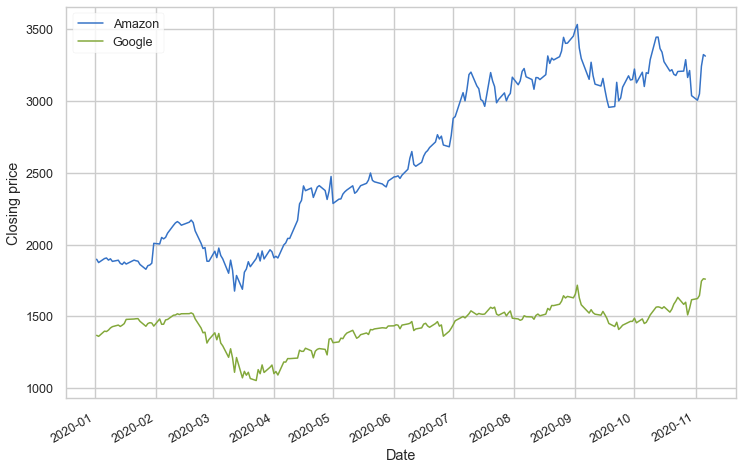

In [52]:
plt.figure(figsize=(12,8))
Amazon['Close'].loc['2020-11-7':'2020-01-01'].plot(label='Amazon')
Google['Close'].loc['2020-11-7':'2020-01-01'].plot(label='Google')
plt.ylabel('Closing price')
plt.legend()

Apple, Microsoft, Facebook and Netflix closing prices:

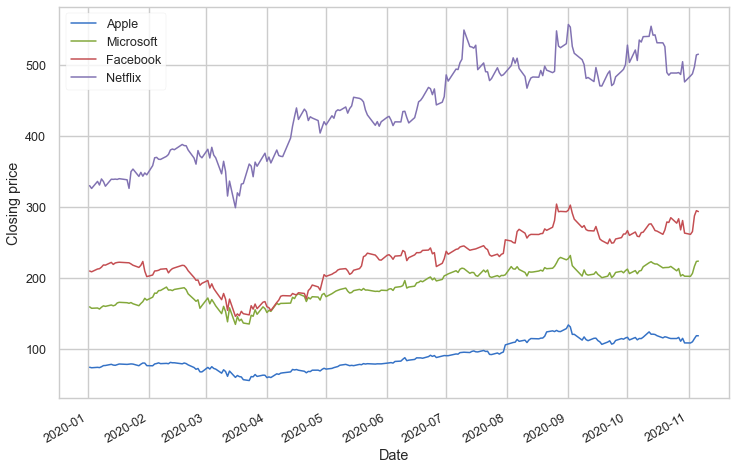

In [53]:
plt.figure(figsize=(12,8))
Apple['Close'].loc['2020-11-7':'2020-01-01'].plot(label='Apple')
Microsoft['Close'].loc['2020-11-7':'2020-01-01'].plot(label='Microsoft')
Facebook['Close'].loc['2020-11-7':'2020-01-01'].plot(label='Facebook')
Netflix['Close'].loc['2020-11-7':'2020-01-01'].plot(label='Netflix')
plt.ylabel('Closing price')
plt.legend()

Quite consistent trends on the stocks from FAANG group!

Pharmaceutical stocks:

In [54]:
Sanofi = data.DataReader('SNY.US', 'stooq')
Novartis = data.DataReader('NVS.US', 'stooq')

Aerospace and Automotive industry:

In [55]:
Airbus = data.DataReader('AIR.DE', 'stooq')
Delta = data.DataReader('DAL.US', 'stooq')
BMW = data.DataReader('BMW.DE', 'stooq')

Selected Pharmaceutical (growing) and industrial (dipping or stagnating) stocks:

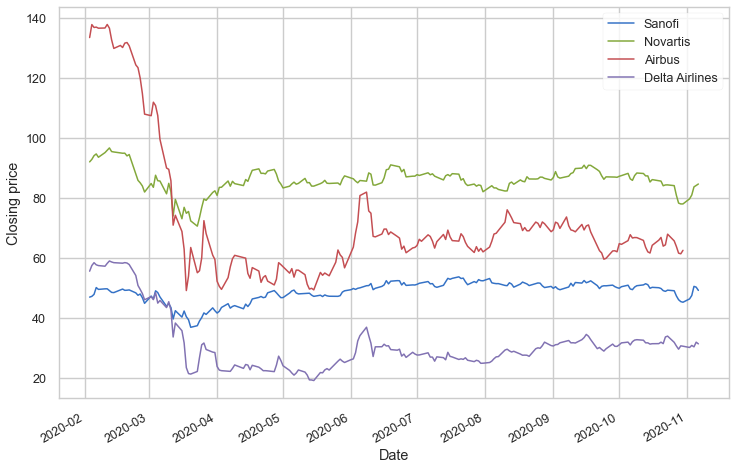

In [56]:
plt.figure(figsize=(12,8))

Sanofi['Close'].loc['2020-11-7':'2020-02-01'].plot(label='Sanofi')
Novartis['Close'].loc['2020-11-7':'2020-02-01'].plot(label='Novartis')

Airbus['Close'].loc['2020-11-7':'2020-02-01'].plot(label='Airbus')
Delta['Close'].loc['2020-11-7':'2020-02-01'].plot(label='Delta Airlines')

plt.ylabel('Closing price')
plt.legend()

Airbus went down by almost 60% and is still not recovering whereas Microsoft is within these two months back at the levels from February:

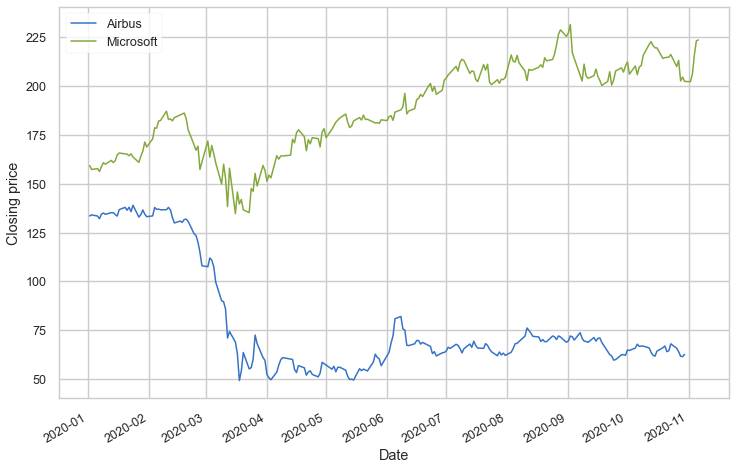

In [57]:
plt.figure(figsize=(12,8))
Airbus['Close'].loc['2020-11-7':'2020-01-01'].plot(label='Airbus')
Microsoft['Close'].loc['2020-11-7':'2020-01-01'].plot(label='Microsoft')
plt.ylabel('Closing price')
plt.legend()

In [58]:
market_tickers = ['Apple', 'Microsoft', 'Amazon', 'Google', 'Facebook', 'Netflix', 'Sanofi', 'Novartis', 'Airbus', 'Delta']

In [59]:
market_stocks = pd.concat([Apple, Microsoft, Amazon, Google, Facebook, Netflix, Sanofi, Novartis, Airbus, Delta], 
                          keys=market_tickers, 
                          axis=1, 
                          names=['Company Ticker', 'Stock Info'])

Checking the data:

In [60]:
market_stocks

Company Ticker    Apple                                         Microsoft  \
Stock Info         Open     High      Low    Close       Volume      Open   
Date                                                                        
2015-11-10       27.078   27.348   26.884   27.045  255282141.0    49.138   
2015-11-11       26.955   27.188   26.689   26.896  195226317.0    48.803   
2015-11-12       26.932   27.058   26.786   26.804  140427436.0    48.603   
2015-11-13       26.686   26.766   26.005   26.017  197793058.0    48.228   
2015-11-16       25.795   26.459   25.708   26.444  164524020.0    48.238   
...                 ...      ...      ...      ...          ...       ...   
2020-11-02      108.920  110.490  107.140  108.580  123078872.0   204.290   
2020-11-03      109.470  111.300  108.540  110.250  107810125.0   203.890   
2020-11-04      113.940  115.390  112.160  114.750  138473969.0   214.020   
2020-11-05      117.750  119.410  116.670  118.820  126605120.0   222.040   
2020-11-06      118.320  119.200  116.130  118.690  114457922.0   222.260   

Company Ticker                                          ...  Airbus          \
Stock Info         High       Low    Close      Volume  ...    Open    High   
Date                                                    ...                   
2015-11-10       49.195   48.4110   48.627  60831809.0  ...  61.115  61.627   
2015-11-11       49.256   48.5850   48.757  40180934.0  ...  61.506  62.242   
2015-11-12       49.058   48.3380   48.457  38909797.0  ...  61.600  62.010   
2015-11-13       48.431   47.7390   48.019  40546141.0  ...  59.539  59.605   
2015-11-16       48.975   48.0290   48.857  35393159.0  ...  58.329  59.401   
...                 ...       ...      ...         ...  ...     ...     ...   
2020-11-02      205.280  200.1200  202.330  30842163.0  ...     NaN     NaN   
2020-11-03      208.120  203.1200  206.430  27512030.0  ...     NaN     NaN   
2020-11-04      218.320  212.4185  216.390  42311777.0  ...     NaN     NaN   
2020-11-05      224.120  221.1500  223.290  36080137.0  ...     NaN     NaN   
2020-11-06      224.360  218.0300  223.720  25231895.0  ...     NaN     NaN   

Company Ticker                             Delta                           \
Stock Info         Low   Close    Volume    Open     High     Low   Close   
Date                                                                        
2015-11-10      60.332  61.571  228707.0  46.011  46.3780  45.056  45.737   
2015-11-11      61.496  62.092  265145.0  45.911  46.1320  45.430  45.450   
2015-11-12      58.786  59.708  384828.0  45.459  45.8590  45.375  45.450   
2015-11-13      58.264  59.028  528866.0  45.303  45.5400  44.330  44.548   
2015-11-16      58.311  59.159  178799.0  43.521  43.7840  42.746  43.583   
...                ...     ...       ...     ...      ...     ...     ...   
2020-11-02         NaN     NaN       NaN  30.620  30.6300  29.670  30.220   
2020-11-03         NaN     NaN       NaN  30.940  31.3600  30.640  30.900   
2020-11-04         NaN     NaN       NaN  30.910  31.3100  30.110  30.430   
2020-11-05         NaN     NaN       NaN  30.850  32.2600  30.800  31.980   
2020-11-06         NaN     NaN       NaN  31.670  31.8435  31.030  31.420   

Company Ticker              
Stock Info          Volume  
Date                        
2015-11-10       8081698.0  
2015-11-11       6731028.0  
2015-11-12      10282559.0  
2015-11-13      10125300.0  
2015-11-16      13569500.0  
...                    ...  
2020-11-02      14200869.0  
2020-11-03      14257917.0  
2020-11-04      12348478.0  
2020-11-05      13145055.0  
2020-11-06      11821147.0  

[1290 rows x 50 columns]

## Market Returns:

In [61]:
market_returns = pd.DataFrame()
for tick in market_tickers:
    market_returns[tick+' Return'] = market_stocks[tick]['Close'].pct_change()

Isolating crisis period (Jan 1st - May 28th (today))

In [62]:
market_returns_crisis = market_returns.loc['2020-02-15':'2020-11-8']
market_returns_crisis

Apple Return  Microsoft Return  Amazon Return  Google Return  \
Date                                                                       
2020-02-17      0.000000          0.000000       0.000000       0.000000   
2020-02-18     -0.018307          0.010060       0.009743       0.000467   
2020-02-19      0.014485          0.003015       0.006750       0.003574   
2020-02-20     -0.010223         -0.015243      -0.007889      -0.005168   
2020-02-21     -0.022681         -0.031667      -0.026534      -0.022103   
...                  ...               ...            ...            ...   
2020-11-02     -0.000828         -0.000691      -0.010431       0.005080   
2020-11-03      0.015380          0.020264       0.014621       0.013138   
2020-11-04      0.040816          0.048249       0.063230       0.060881   
2020-11-05      0.035468          0.031887       0.024942       0.009537   
2020-11-06     -0.001094          0.001926      -0.003200      -0.001572   

            Facebook Return  Netflix Return  Sanofi Return  Novartis Return  \
Date                                                                          
2020-02-17         0.000000        0.000000       0.000000         0.000000   
2020-02-18         0.016902        0.019401       0.024220        -0.004402   
2020-02-19        -0.001423       -0.004100      -0.008412         0.000200   
2020-02-20        -0.013380       -0.000492       0.000792        -0.009568   
2020-02-21        -0.020505       -0.015363       0.001987         0.004889   
...                     ...             ...            ...              ...   
2020-11-02        -0.006651        0.017615       0.024503         0.021644   
2020-11-03         0.015075        0.006403       0.024564         0.016046   
2020-11-04         0.083227        0.019970       0.063933         0.033436   
2020-11-05         0.025402        0.033826      -0.005139         0.005611   
2020-11-06        -0.004310        0.001888      -0.021458         0.005817   

            Airbus Return  Delta Return  
Date                                     
2020-02-17       0.007542      0.000000  
2020-02-18      -0.005194     -0.003060  
2020-02-19       0.011210      0.003309  
2020-02-20       0.001519     -0.002222  
2020-02-21      -0.008340     -0.008736  
...                   ...           ...  
2020-11-02       0.000000     -0.013708  
2020-11-03       0.000000      0.022502  
2020-11-04       0.000000     -0.015210  
2020-11-05       0.000000      0.050937  
2020-11-06       0.000000     -0.017511  

[189 rows x 10 columns]

Average daily returns between mid-Feb 2020 and May 28th 2020:

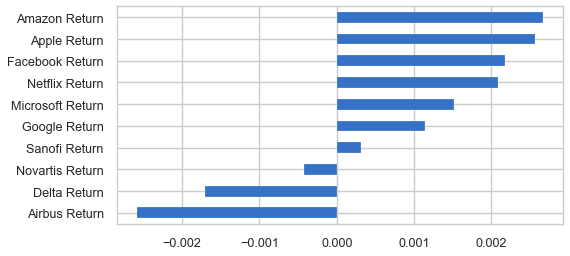

In [63]:
plt.figure(figsize=(8,4))
market_returns_crisis.mean().sort_values(ascending=True).plot(kind='barh')

Amazon's race to historical peaks is visible whereas crisis looms over the Automotive and Aerospace industry.

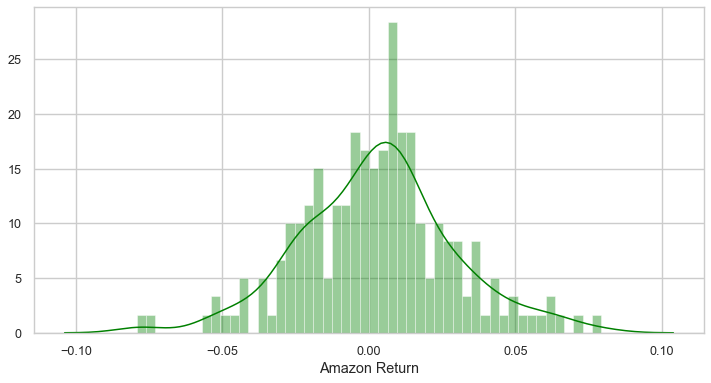

In [64]:
plt.figure(figsize=(12,6))
sns.distplot(market_returns_crisis['Amazon Return'], 
             color='green', 
             bins=50,  
             hist_kws=dict(edgecolor="w", linewidth=1)
            )

Larger discrepancies on Delta Airlines:

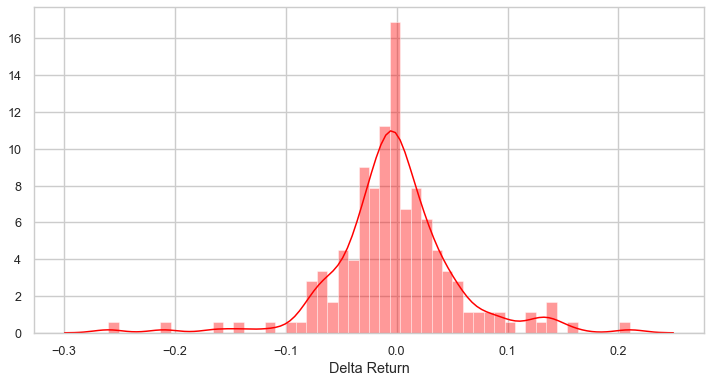

In [65]:
plt.figure(figsize=(12,6))
sns.distplot(market_returns_crisis['Delta Return'], 
             color='red', 
             bins=50,  
             hist_kws=dict(edgecolor="w", linewidth=1)
            )

Classic correlation investigation with pairplot:

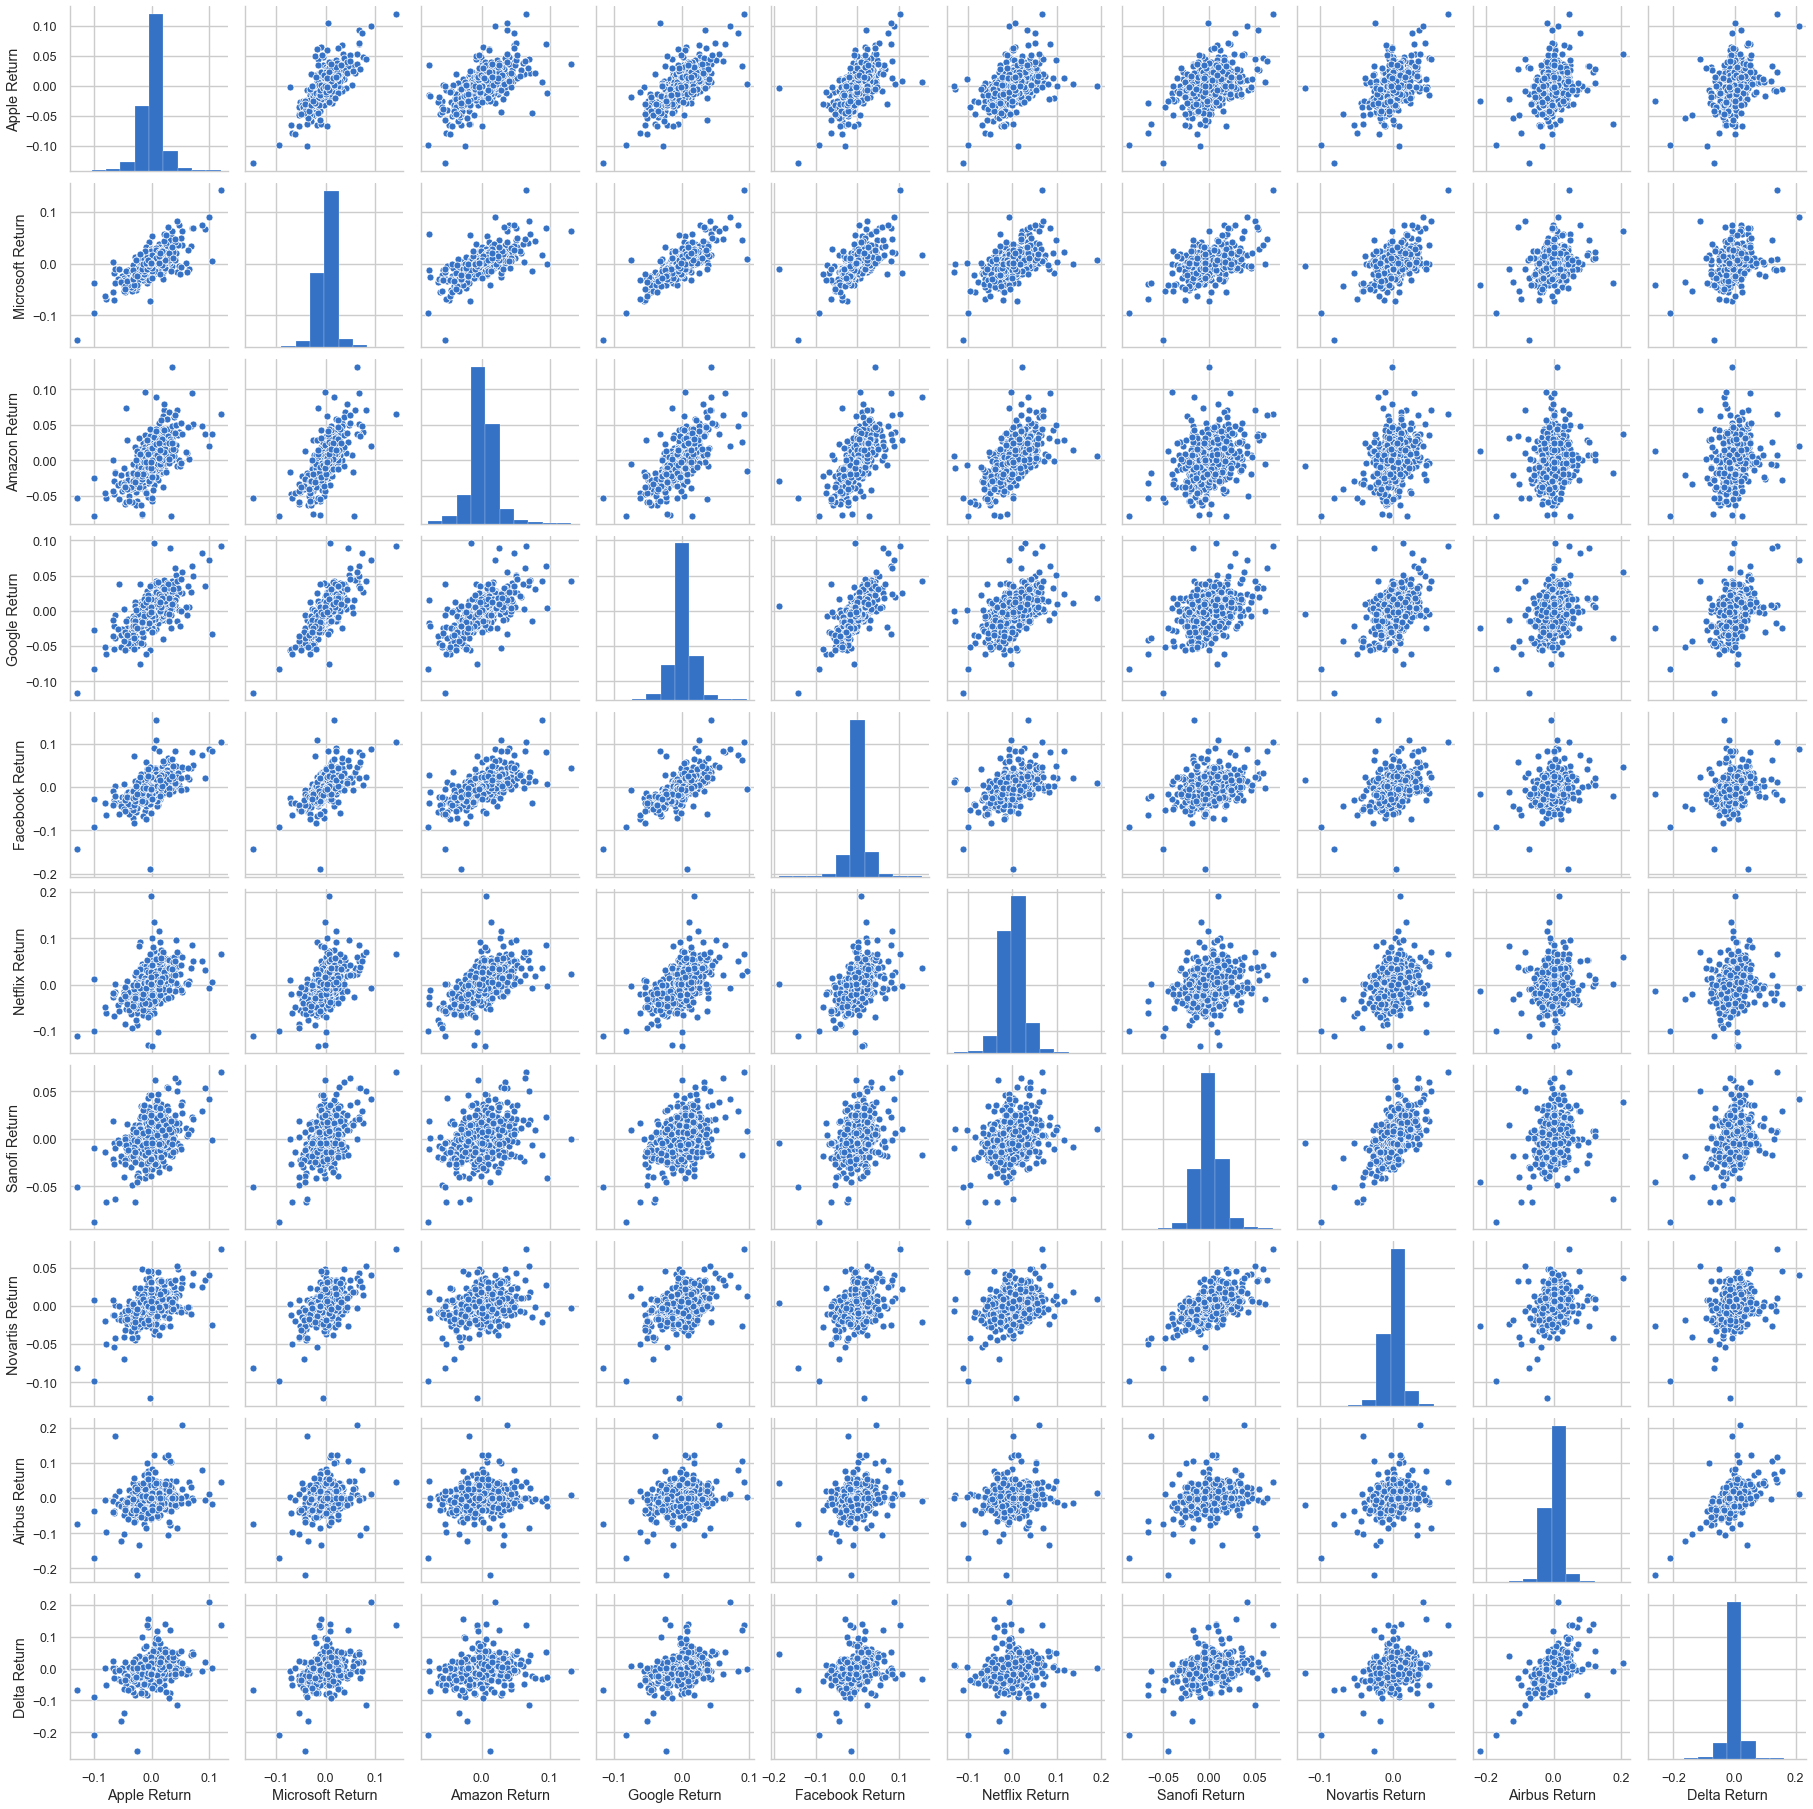

In [66]:
sns.pairplot(market_returns)

Microsoft and Apple look noticably correlated (it is also related to personal relations between Warren Buffet and Bill Gates, who own stocks of each others' companies).

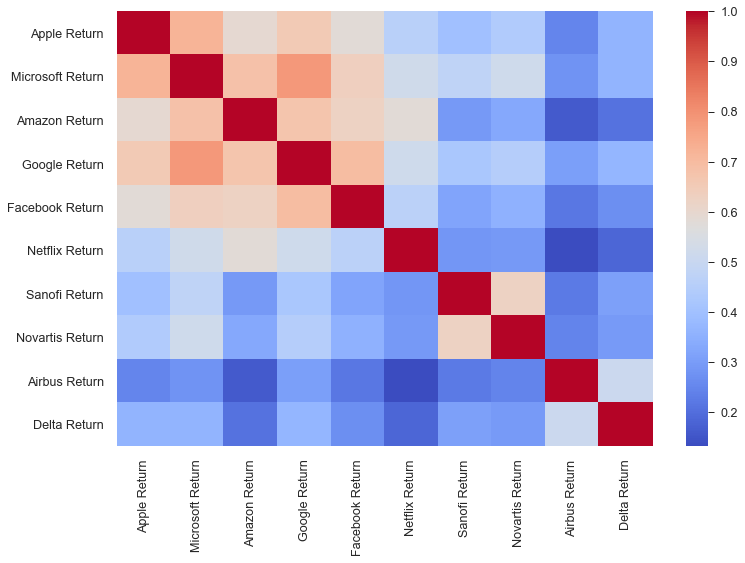

In [67]:
plt.figure(figsize=(12,8))
sns.heatmap(market_returns.corr(), cmap='coolwarm')

Heatmap above shows, that predictably: daily returns for tech and pharmaceutical stocks are correlated. The most for Google and Microsoft (	0.749647).

Clustermap:

<Figure size 864x576 with 0 Axes>

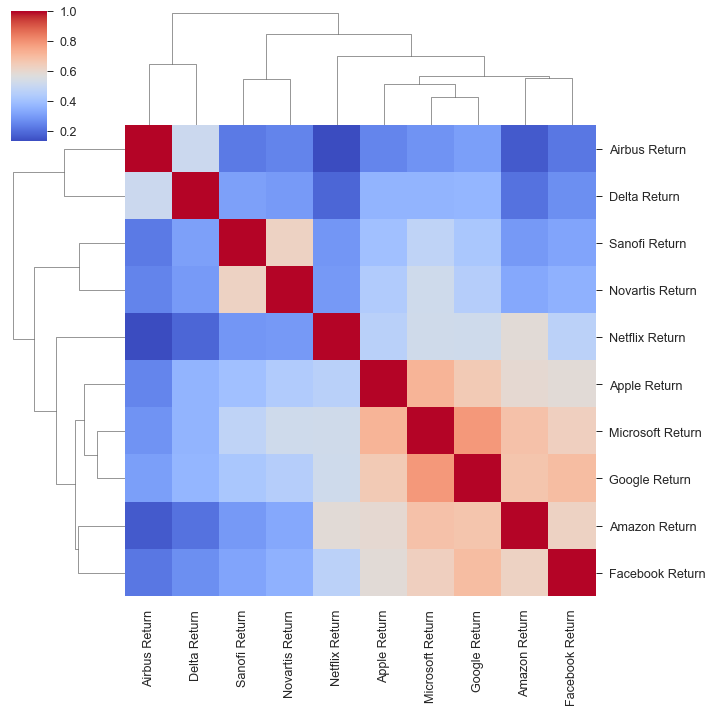

In [68]:
plt.figure(figsize=(12,8))
sns.clustermap(market_returns.corr(), cmap='coolwarm')

The dendrogram above correctly points out that there are 3 main clusters of interest (the longest vertical line without crossing method): Tech, Pharmaceutics and Aerospace/Automotive.

#### Total execution time:

In [69]:
print(datetime.now() - startTime)

0:00:40.389128
